<a href="https://colab.research.google.com/github/vigu184/TensorFlow_CM/blob/master/TensorflowAssign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
image_set = tf.keras.datasets.cifar10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = image_set.load_data()

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
train_images=train_images/255.0
train_images.shape

(50000, 32, 32, 3)

In [ ]:
test_images=test_images/255.0
test_images.shape
test_labels.shape

(10000, 1)

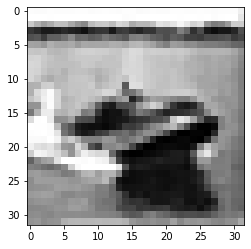

In [ ]:
plt.imshow(test_images[150])

In [ ]:
c10=tf.keras.models.Sequential()

In [ ]:
c10.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=[32,32,3]))

In [ ]:
c10.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))

In [ ]:
c10.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
c10.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))

In [ ]:
c10.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3, padding="same", activation="relu"))

In [ ]:
c10.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [ ]:
c10.add(tf.keras.layers.Flatten())

In [ ]:
c10.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))

In [ ]:
c10.add(tf.keras.layers.Dense(units=128,activation='relu'))
c10.add(tf.keras.layers.Dense(units=128,activation='softmax'))

In [ ]:
c10.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [ ]:
c10.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])


In [ ]:
c10.fit(train_images, train_labels,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 219s 140ms/step - loss: 1.5312 - sparse_categorical_accuracy: 0.4490
Epoch 2/15
1563/1563 [==============================] - 219s 140ms/step - loss: 1.0782 - sparse_categorical_accuracy: 0.6157
Epoch 3/15
1563/1563 [==============================] - 225s 144ms/step - loss: 0.9128 - sparse_categorical_accuracy: 0.6767
Epoch 4/15
1563/1563 [==============================] - 227s 146ms/step - loss: 0.8255 - sparse_categorical_accuracy: 0.7094
Epoch 5/15
1563/1563 [==============================] - 228s 146ms/step - loss: 0.7527 - sparse_categorical_accuracy: 0.7350
Epoch 6/15
1563/1563 [==============================] - 226s 144ms/step - loss: 0.6955 - sparse_categorical_accuracy: 0.7532
Epoch 7/15
1563/1563 [==============================] - 220s 140ms/step - loss: 0.6470 - sparse_categorical_accuracy: 0.7717
Epoch 8/15
1563/1563 [==============================] - 219s 140ms/step - loss: 0.6132 - sparse_categorical_accuracy: 0.7843


In [ ]:
test_labels_pred = c10.predict(test_images)

In [ ]:
test_labels_pred.shape

(10000, 128)

In [ ]:
label_pred=np.argmax(test_labels_pred, axis=1)
label_pred.shape

(10000,)

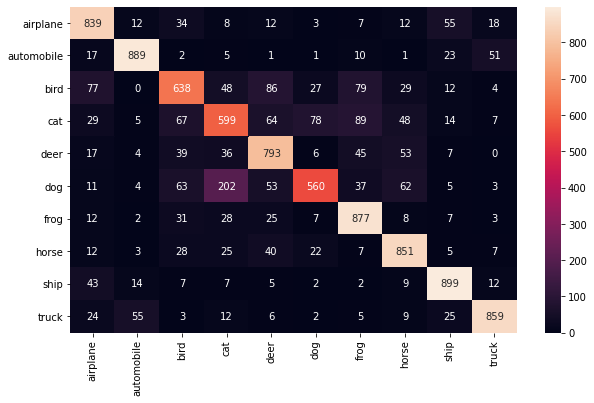

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm = confusion_matrix(test_labels,label_pred)
index = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
columns = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
cm_df = pd.DataFrame(cm,columns,index) 
plt.figure(figsize=(10,6))
plt.xlabel('predicted label')
plt.ylabel('actual label')           
sn.heatmap(cm_df, annot=True, fmt='g')